# Handling Imbalanced Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
churn_df = pd.read_csv('DATA_Customer-Churn-Copy1.csv') 

In [5]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [6]:
# Convert the 'TotalCharges' column to numeric type
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'], errors='coerce')

In [7]:
churn_df['TotalCharges'].fillna(churn_df['TotalCharges'].mode(), inplace=True)

In [8]:
churn_df['Churn'] = churn_df['Churn'].map({'Yes': 1, 'No': 0})

In [9]:
churn_df.dropna(inplace=True)
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.60,1


In [10]:
features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']
X = churn_df[features]
y = churn_df['Churn']

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the scaler fitted on the training data
X_test_scaled = scaler.transform(X_test)

## Upsampling using SMOTE¶

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [14]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [15]:
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

## Models comparison

In [17]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model,X_sm, y_sm, cv=5, scoring = 'recall'))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Classification Tree': 0.7539951573849878, 'Logistic Regression': 0.771186440677966, 'KNN': 0.8358353510895883}


In [18]:
print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Classification Tree,Logistic Regression,KNN
score,0.753995,0.771186,0.835835


## Applying KNN

In [37]:
model = KNeighborsClassifier(n_neighbors=15,weights='uniform') # declare we're using knn classification model
model.fit(X_sm, y_sm) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_sm.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_sm, y_pred_train),
                                         precision_score(y_sm, y_pred_train),
                                         recall_score(y_sm, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.793462,0.706468
1,Precision,0.768736,0.465729
2,Recall,0.839467,0.708556


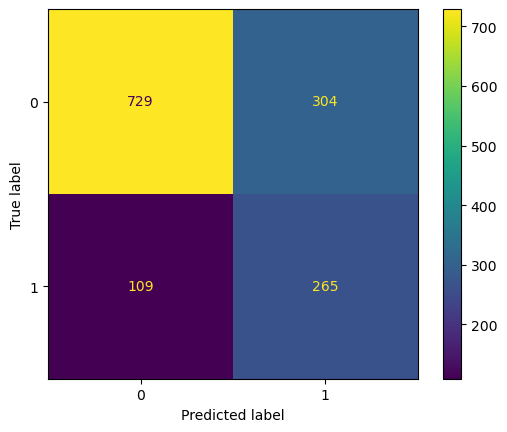

In [38]:
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Lab -  Random Forest and Hyper - parameter tunning
### Friday 23.02.2024

###### Exercise no. 1 Tune the hyper paramters with gridsearch and check the results.

In [22]:
knn_clf = KNeighborsClassifier()

param_grid = {"n_neighbors" : [3,5,6,8,10,15]}

In [23]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid, cv = 5, return_train_score=True,n_jobs = -1,)

In [25]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 6, 8, 10, 15]},
             return_train_score=True)

In [26]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'n_neighbors': 15}

##### Exercise no.2 fit a Random forest Classifier on the data and compare the accuracy.

In [28]:
RAND_STATE = 42 # for reproducible shuffling
TT_RATIO = 0.25 # test/train

In [30]:
def down_samp_rand(Xin, yin, ratio=1):
        from imblearn.under_sampling import RandomUnderSampler
        """Downsamples majority class using random sampling.
        Ratio argument is the ratio of minority class to the downsampled majority
        """
        rus = RandomUnderSampler(sampling_strategy=ratio, random_state=RAND_STATE)
        X_rus, y_rus = rus.fit_resample(Xin, yin)
        return X_rus, y_rus

In [31]:
X_train, y_train = down_samp_rand(X_train,y_train)

In [32]:
# check that we have downsampled
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc_ops = {"max_depth":6,
           "min_samples_leaf":20,
           "n_estimators":100,
           "bootstrap":True,
           "oob_score":True,
           "random_state":RAND_STATE}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_train)
print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_train)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

train prediction accuracy score: 0.77
test prediction accuracy score: 0.71


In [34]:
clf.oob_score_

0.7558528428093646

In [35]:
from sklearn.metrics import accuracy_score
score_ds = accuracy_score(y_test,clf.predict(X_test))

In [36]:
score_ds

0.7114427860696517

In [42]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002526,0.000565,0.028183,0.006961,3,{'n_neighbors': 3},0.757333,0.761778,0.750222,0.774222,...,0.765689,0.012376,6,0.862889,0.858889,0.862000,0.856444,0.860000,0.860044,0.002290
1,0.002192,0.000582,0.027503,0.004120,5,{'n_neighbors': 5},0.764444,0.764444,0.760889,0.785778,...,0.773511,0.012775,5,0.841778,0.840889,0.841333,0.834444,0.830667,0.837822,0.004472
2,0.002566,0.000080,0.026961,0.003043,6,{'n_neighbors': 6},0.775111,0.781333,0.772444,0.791111,...,0.784178,0.010538,4,0.832667,0.827778,0.834000,0.829111,0.825333,0.829778,0.003174
3,0.002434,0.000132,0.026053,0.003307,8,{'n_neighbors': 8},0.785778,0.775111,0.775111,0.794667,...,0.785067,0.008753,3,0.820444,0.825778,0.824667,0.820222,0.816667,0.821556,0.003299
4,0.002420,0.000185,0.031434,0.007490,10,{'n_neighbors': 10},0.789333,0.781333,0.783111,0.797333,...,0.788267,0.005689,2,0.817778,0.818222,0.817556,0.816222,0.814222,0.816800,0.001451
5,0.001748,0.000517,0.028378,0.006394,15,{'n_neighbors': 15},0.785778,0.788444,0.792000,0.790222,...,0.791822,0.005799,1,0.816000,0.816000,0.818889,0.815333,0.814667,0.816178,0.001443


##### Cross validation

In [39]:
from sklearn.model_selection import cross_val_score
folds=5
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=folds)


In [40]:
print("cv scores over {:d} iterations: \n".format(folds))
cross_val_scores

cv scores over 5 iterations: 



array([0.7826087 , 0.73913043, 0.72909699, 0.75250836, 0.77090301])

In [41]:
print("the std. dev. in the cv scores is {:.4f}".format(np.std(cross_val_scores)))

the std. dev. in the cv scores is 0.0197
